Plotting of MOB annotations

data files needed to run are available at SCP: https://singlecell.broadinstitute.org/single_cell/study/SCP979/
please download:<br>
coordinate_registration_sm-omics.p<br>
10015CN60_C2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN83_D1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN84_C1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN84_E2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN85_E1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN60_E2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN83_D2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN84_C2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN85_C1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN85_E2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN83_C1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN83_E1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN84_D1_stdata_adjusted.tsv.annotations.tsv <br>
10015CN85_C2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN83_C2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN83_E2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN84_D2_stdata_adjusted.tsv.annotations.tsv <br>
10015CN85_D1_stdata_adjusted.tsv.annotations.tsv<br>

In [15]:
from __future__ import absolute_import, division, print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle
import math
import matplotlib

In [16]:
path = ''


In [17]:
# Load registration file
reg_file = os.path.join(path, 'coordinate_registration_sm-omics.p')

registered_coordinates_dict = pickle.load(open(reg_file,'rb'), encoding='bytes') 


In [18]:
annot_list = []
name_list = []
regions_list = []

for filename in glob.glob(os.path.join(path,'*stdata_adjusted.tsv.annotations.tsv')):
    
    name_list.append(filename.split('/')[-1].split('_stdata')[0])
    
    # Read file
    annot = pd.read_csv(filename, sep='\t')
    
    annot_melt = pd.melt(annot, id_vars=['Unnamed: 0'])
    
    annot_melt.rename(columns={'Unnamed: 0':'region'}, inplace=True)
    
    annot_melt = annot_melt[annot_melt['value'] != 0]
    
    annot_list.append(annot_melt)
    
    # Get the regions
    for reg in annot_melt['region'].tolist():
        regions_list.append(reg)

regions_list = list(set(regions_list))


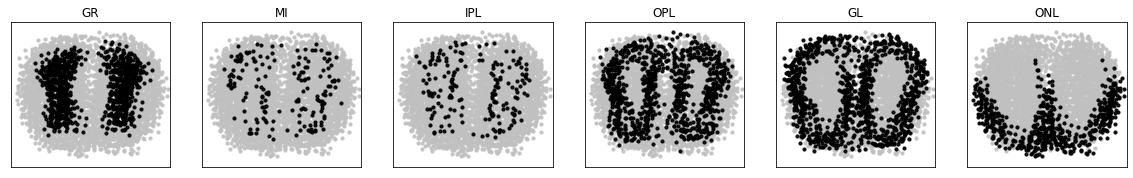

In [19]:
## Same, but one gene in each figure, ie. no subplots

# initialize a figure
fig = plt.figure(figsize=(20, 7))

axes = []
for ax_idx in range(0,1):
    for i in range(len(['GR', 'MI', 'IPL', 'OPL', 'GL', 'ONL'])):
        ax = plt.subplot2grid((1, len(['GR', 'MI', 'IPL', 'OPL', 'GL', 'ONL'])), (ax_idx, i))
        axes.append(ax)                    

alpha = -65
        
############# Plot ############# 
for idx, region in enumerate(['GR', 'MI', 'IPL', 'OPL', 'GL', 'ONL']):
           
    axes[idx].set_aspect('equal')
    
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])
    
    axes[idx].set_xlim([-11,11])
    axes[idx].set_ylim([-10,10])
        
############ NOT IN REGION ##############
    # loop over the annot_files
    for n,annot_file in enumerate(annot_list):

        # Information stored in *information.p file
        count_path = ''

        count_file = os.path.join(count_path, name_list[n] + '_stdata_adjusted.tsv')

        # Find spots in and outside region
        NOT_in_region = annot_file[annot_file['region'] != region]
        
        # for each ST spot on the array, let us get its registered coordinate if available
        coordinates_found = np.zeros(len(list(NOT_in_region['variable']))) # indicator of being registered
        coordinates = []  
        for coord_idx,coordinate in enumerate(NOT_in_region['variable']):
            if coordinate in registered_coordinates_dict[count_file]:
                coordinates_found[coord_idx] = 1
                coordinates.append(list(map(float,registered_coordinates_dict[count_file][coordinate].split('_'))))
        coordinates = np.array(coordinates)
             
        x_coordinates = math.cos(math.radians(alpha))*coordinates[:,0] - math.sin(math.radians(alpha))*coordinates[:,1]
        y_coordinates = math.sin(math.radians(alpha))*coordinates[:,0] + math.cos(math.radians(alpha))*coordinates[:,1]


        # visualize the registered ST spots THAT ARE NOT IN REGION
        axes[idx].scatter(x_coordinates,y_coordinates,s=10,marker='o', c='silver', alpha=0.9)
        axes[idx].set_title(region)
        
############ IN REGION ##############
    # loop over the annot_files
    for n,annot_file in enumerate(annot_list):

        # Information stored in *information.p file
        count_path = ''

        count_file = os.path.join(count_path, name_list[n] + '_stdata_adjusted.tsv')

        # Find spots in and outside region
        IN_region = annot_file[annot_file['region'] == region]
        
        # for each ST spot on the array, let us get its registered coordinate if available
        coordinates_found = np.zeros(len(list(IN_region['variable']))) # indicator of being registered
        coordinates = []  
        for coord_idx,coordinate in enumerate(IN_region['variable']):
            if coordinate in registered_coordinates_dict[count_file]:
                coordinates_found[coord_idx] = 1
                coordinates.append(list(map(float,registered_coordinates_dict[count_file][coordinate].split('_'))))
        coordinates = np.array(coordinates)

        x_coordinates = math.cos(math.radians(alpha))*coordinates[:,0] - math.sin(math.radians(alpha))*coordinates[:,1]
        y_coordinates = math.sin(math.radians(alpha))*coordinates[:,0] + math.cos(math.radians(alpha))*coordinates[:,1]
        
        # visualize the registered ST spots THAT ARE IN REGION
        axes[idx].scatter(x_coordinates,y_coordinates,s=10,marker='o', c='k', alpha=0.9)

